# Which Games Grinding?

In this project, an open-source data on video games' users review, critics review, genre, platform, and historical sales are given. Analysis to all games' commercial viability is needed to build strategies on the promotional campaign.

The purpose of the analysis is:

1. To understand what platfrom generates the most sales, and how the trend moves

2. To understand how users review and critics review affect a platform's sales

3. To understand what game genre generates the most sales

4. To test hypothesis on users scoring for each platform: Xbox One and PC

5. To test hypothesis on users scoring for each game genre: Action and Sports


## Data Pre-processing

### Load Data

In [52]:
# Import libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import scipy.stats as st

In [53]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [54]:
# Load dataset
games = pd.read_csv('/content/gdrive/MyDrive/data_projects/games.csv')

### Data Quality Checking

In [55]:
# Load general info
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [56]:
# Load data samples
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [57]:
# Load statistical description
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [58]:
# Check distribution of Name in dataset
games.Name.value_counts()

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: Name, Length: 11559, dtype: int64

In [59]:
# Check top 20 platform in dataset
games.Platform.value_counts().head(20)

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
Name: Platform, dtype: int64

In [60]:
# Check distribution of Genre in dataset
games.Genre.value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [61]:
# Check distribution of Year_of_Release in dataset
games.Year_of_Release.value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

In [62]:
# Check for duplicates
games.duplicated().sum()

0

In [63]:
# Check number of missing values in each column
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [64]:
# Check the parallel in the missing values
games.loc[(games.Critic_Score.isna()) & 
          (games.User_Score.isna()) & (games.Rating.isna())].sort_values(by='NA_sales',ascending=False)
                                                                             

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10704,Naruto Shippuden: Gekito Ninja Taisen! EX,Wii,2007.0,Fighting,0.00,0.00,0.10,0.00,NaN,NaN,NaN
10706,Nihon Keizai Shinbunsha Kanshuu: Shiranai Mama...,DS,2009.0,Misc,0.00,0.00,0.10,0.00,NaN,NaN,NaN
10709,Real Bout Garou Densetsu,SAT,1996.0,Fighting,0.00,0.00,0.10,0.00,NaN,NaN,NaN
10711,Project FIFA World Cup,PS2,2002.0,Sports,0.00,0.00,0.10,0.00,NaN,NaN,NaN


Problems in the dataset:

1. Mismatch data type in column Year_of_Release

2. Mismatch data type in column User_Score, and some data are 'tbd'.

3. Missing values in: Name, Year_of_Release, Genre, Critic_Score, User_Score, and Rating

4. Columns' name are not in all lowercase

Almost all of the missing values in Critic_Score, User_Score, and Rating are parallel. This might be due to:

1. games were released in the past year, that back then no reviews and rating was ever quoted

2. low popularity of the game that no reviews and rating have been quoted

### Data Improving

In [65]:
# Lower case columns names
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-danger">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Lebih baik gunakan `str().lower()`

</div>

<div class="alert alert-info">
<b>Student answer</b> <a class="tocSkip"></a>

beres, mas!

</div>

<div class="alert alert-success">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Mantab!

</div>

In [66]:
# Find the release year for rows with missing values in Year_of_Release but have years decribed in Names
games.loc[(games.year_of_release.isna()) & (games.name.str.contains('\d{4}', regex=True))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2572,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
3486,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E
5156,NBA Live 2003,XB,NaN,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5336,Tomb Raider (2013),PC,NaN,Action,0.06,0.25,0.00,0.04,86.0,8.5,M
5655,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E


In [67]:
# Fill missing values year_of_release with year described in name
year_data = games.loc[(games.year_of_release.isna()) & (games.name.str.contains('\d{4}', regex=True))]
year_data = year_data.name.str.extract(pat='(\d{4})')
year_data
games.loc[(games.year_of_release.isna()) & (games.name.str.contains('\d{4}', regex=True)), ['year_of_release']] = year_data

In [68]:
# Check for the unreasonable year_of_release
games.groupby('platform')['year_of_release'].min()

platform
2600    1980.0
3DO     1994.0
3DS     2011.0
DC      1998.0
DS      1985.0
GB      1988.0
GBA     2000.0
GC      2001.0
GEN     1990.0
GG      1992.0
N64     1996.0
NES     1983.0
NG      1993.0
PC      1985.0
PCFX    1996.0
PS      1994.0
PS2     2000.0
PS3     2006.0
PS4     2013.0
PSP     2004.0
PSV     2011.0
SAT     1994.0
SCD     1993.0
SNES    1990.0
TG16    1995.0
WS      1999.0
Wii     2006.0
WiiU    2012.0
X360    2005.0
XB      2000.0
XOne    2013.0
Name: year_of_release, dtype: float64

From checking on year_of_release, it appears that several games are listed with year before the release year of their platforms. Hence for games in below platforms, correction of the release year will be made to reflect the release of the platform itself:

1. DS: 2004

2. GB: 1989

3. GBA: 2001

4. XB: 2001

In [69]:
# Change year_of_release of games with year before the release year of their platforms
platform_release = {'DS': 2004, 'GB': 1989, 'GBA': 2001, 'XB': 2001}
for release in platform_release:
    games.loc[(games.platform == release) & (games.year_of_release < platform_release[release]), 'year_of_release'] = 2004

In [70]:
# Re-check for the unlikely year_of_release
games.groupby('platform')['year_of_release'].min()

platform
2600    1980.0
3DO     1994.0
3DS     2011.0
DC      1998.0
DS      2004.0
GB      1989.0
GBA     2001.0
GC      2001.0
GEN     1990.0
GG      1992.0
N64     1996.0
NES     1983.0
NG      1993.0
PC      1985.0
PCFX    1996.0
PS      1994.0
PS2     2000.0
PS3     2006.0
PS4     2013.0
PSP     2004.0
PSV     2011.0
SAT     1994.0
SCD     1993.0
SNES    1990.0
TG16    1995.0
WS      1999.0
Wii     2006.0
WiiU    2012.0
X360    2005.0
XB      2001.0
XOne    2013.0
Name: year_of_release, dtype: float64

In [71]:
# Check distribution in user_score
games.user_score.value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [72]:
# Change 'tbd' in user_score to np.nan
games.loc[games.user_score == 'tbd', ['user_score']] = np.nan

In [73]:
# Change the data type of user_score to float
games.user_score = games.user_score.astype(float)

In [74]:
# Drop rows with missing values in name
games.dropna(subset=['name'], inplace=True)

In [75]:
# Drop rows with missing values in genre
games.dropna(subset=['genre'], inplace=True)

In [76]:
# Re-check general info
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


# Interim Conclusion

Data type in year_of_release is left as is for now, and the missing values are left as they are, for no urgency to replace them at this stage.

While data type in user_score is changed float. The reason for changing data type of user_score is the data having decimals.

Some games have unreasonable year_of_release, that are earlier than the release year of their platforms. They are changed as well.

Rows with missing values in name and genre are dropped, cosidering the portion being insignificant.

Missing values in year_of_release, critic_score, user_score, and rating are left as they are. There is no a good reliable way to fill them. Yet the data in those rows are useful for anaylsis that is either related with sales amount or scoring.

## Exploratory Data Analysis

### Annual Game Release

In this step, total of games released every yearis checked. This will help to decide the scope of relevant data to the projected year, that is 2017.

In [77]:
# Check for number of games listed in every pertaining year
yearly_games = pd.pivot_table(data=games, index='year_of_release', values='name', aggfunc='count').reset_index()
yearly_games

,year_of_release,name
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,13
6,1986.0,21
7,1987.0,16
8,1988.0,14
9,1989.0,17


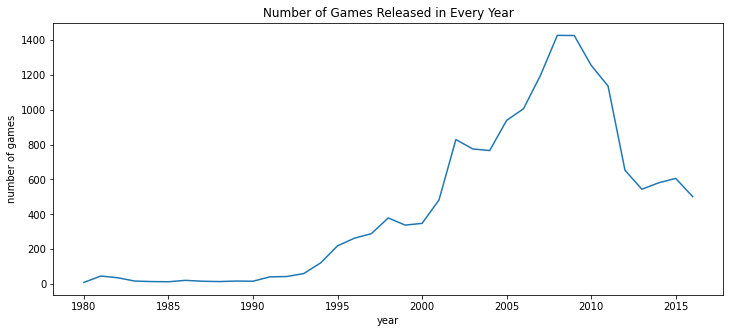

In [148]:
# Load the lineplot
plt.figure(figsize=(12,5))
plt.title('Number of Games Released in Every Year')
sns.lineplot(data=yearly_games, x='year_of_release', y='name')
plt.ylabel('number of games')
plt.xlabel('year')
plt.show()

# Interim Conclusion

From the analysis, it appears that Year 2008 and 2009 are the peak of popularity for games. Since then the trend goes down, although a small insignificant pick-up happens in 2015 before decreasing again in 2016.

Also, from year 2000 and backward less than 400 games were released. That is also the case for missing values in year_of_release that appear in 269 rows. Many years and missing values rows then can be dropped from the dataset for further analysis.

Hence for relevancy to the projection in Year 2017, it might be good to consider only using data from latest. Trend has changed significantly since 1980. But further analysis to determine how many years back data should be used, it will be examined more in the following steps.

### Sales Trend for each Platform

In this next step below questions will be addressed:

1. How sales vary between platforms

2. How the most popular platform earns year on year

3. What platforms are used to be popular but no longer sales in 2016

4. How long, in average, after 1980 platforms are first released. And how long, in average, after their first release, platforms are no longer selling

#### How sales vary between platforms

In [79]:
# Add column of total sales
games['total_sales'] = games.na_sales + games.eu_sales + games.jp_sales + games.other_sales

In [80]:
# Pivot Total Sales per Platform
sales_games = pd.pivot_table(data=games, index='platform', values='total_sales', 
                             aggfunc=sum).sort_values(by='total_sales',ascending=False).reset_index()
sales_games

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


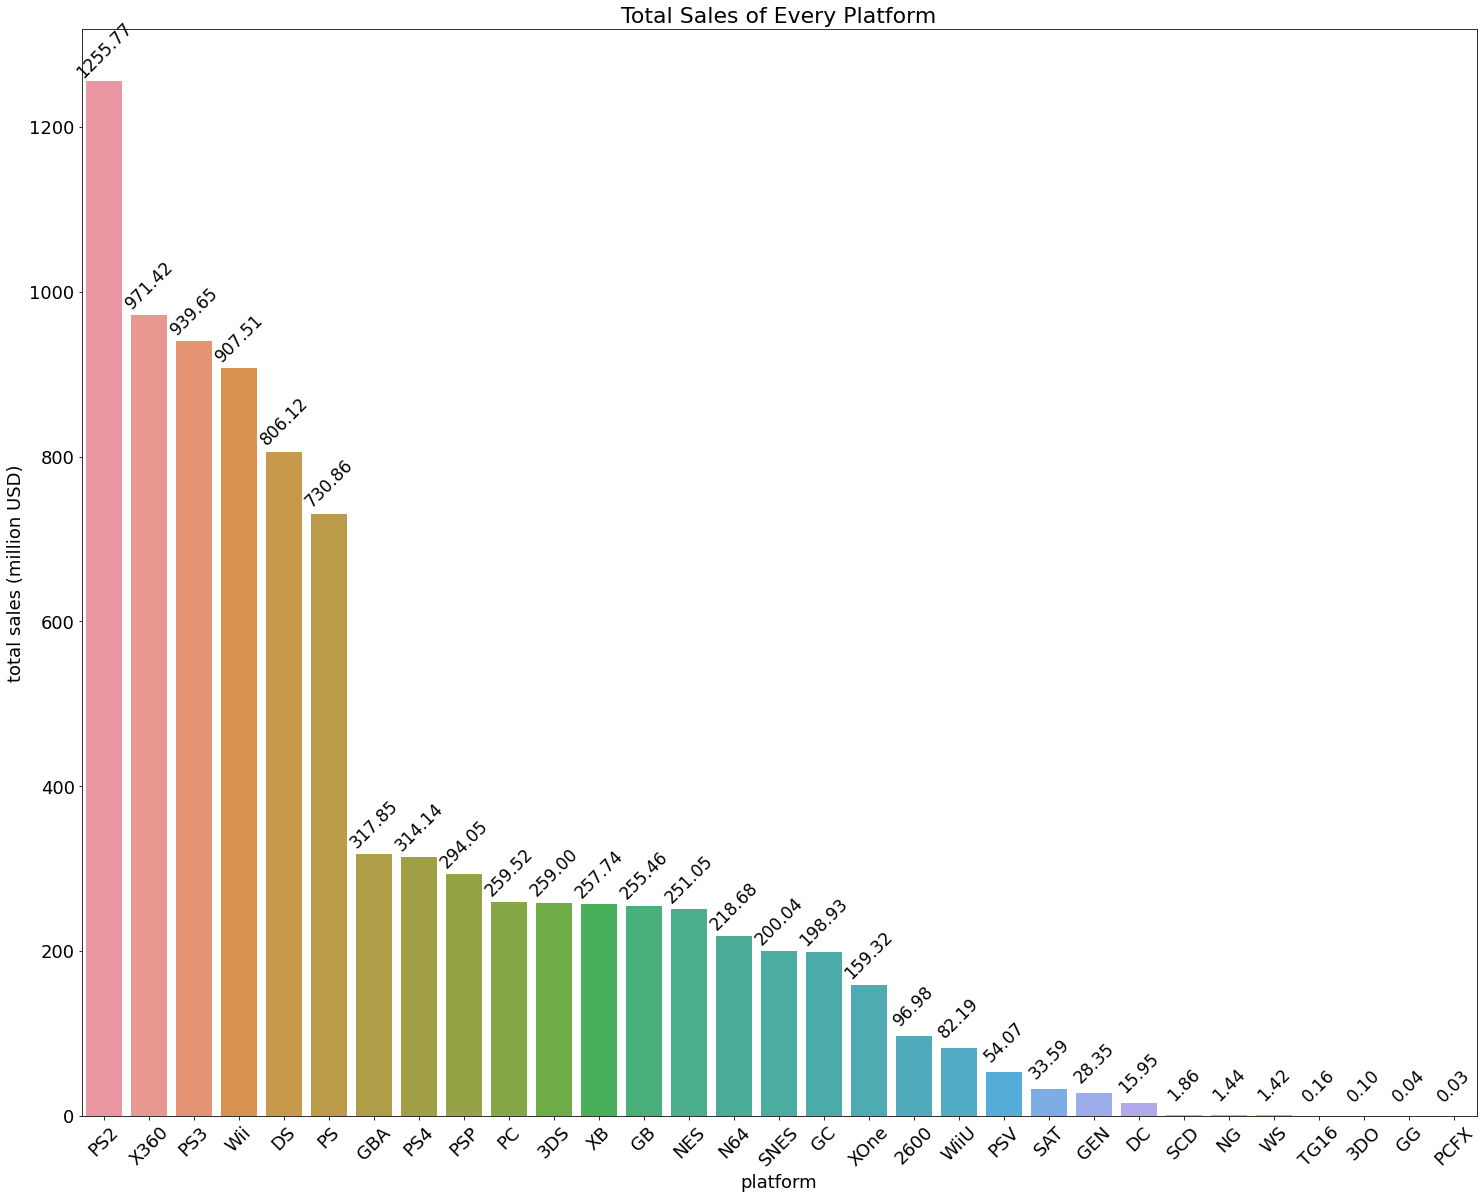

In [81]:
# Create bar plot for total sales in each platform
plt.figure(figsize=(25,20)) # scale up figure size
splot = sns.barplot(data=sales_games, x='platform', y='total_sales') # assign plot to object

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.2f'), # 2 decimals on label value
                   (g.get_x() + g.get_width()/2, # help position the label x-axis-wise
                    g.get_height()), # help position the label y-axis-wise
                   fontsize=17, #font size plot
                   ha = 'center', va = 'center', # center label horizontally and vertically to plot
                   xytext = (0, 30), rotation=45, # distant 30 pixel from plot, rotate label on plot 45
                   textcoords = 'offset points')
plt.title('Total Sales of Every Platform', fontsize=22)
plt.ylabel('total sales (million USD)',fontsize=18)
plt.xlabel('platform',fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18,rotation = 45)
plt.show()

It appears that Platform with the highest total sales is PS2 with more than 1,200 million US Dollars, and followed by X360, PS3, Wii. And the lowest is PCFX with only 300 thousand US Dollars.

#### How the most popular platform earns year on year

In [82]:
# Distribution of year on year sales for platform PS2
PS2_Sales = games.query('platform == "PS2"')
PS2_Sales = pd.pivot_table(data=PS2_Sales, index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
PS2_Sales

,year_of_release,total_sales
0,2000.0,39.17
1,2001.0,166.43
2,2002.0,205.38
3,2003.0,184.31
4,2004.0,211.81
5,2005.0,160.66
6,2006.0,103.42
7,2007.0,75.99
8,2008.0,53.90
9,2009.0,26.40


Text(0, 0.5, 'sales')

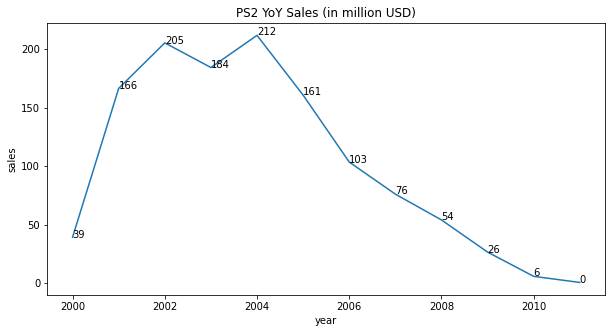

In [83]:
# Create lineplot for year on year sales for PS2
plt.figure(figsize=(10,5))
sns.lineplot(data=PS2_Sales, x='year_of_release', y='total_sales');
for item in PS2_Sales.groupby('year_of_release'):
    for x,y,m in item[1][['year_of_release','total_sales','total_sales']].values:
        plt.text(x, round(y), round(m))
plt.title('PS2 YoY Sales (in million USD)')
plt.xlabel('year')
plt.ylabel('sales')

It appears that the best selling platform PS2 has its uptrending from first released in 2000, until 2004. But after its 5th year selling in the market, the sales went down the hill until it does not sale anymore in the 12th year since its released, or 2011 onward.

#### What platforms are used to be popular but no longer selling in 2016

In [84]:
# Pivot the dataset on year on year sales for each platform
sales_platform = pd.pivot_table(data=games, index='platform', values='total_sales', 
                                aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
sales_platform

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [85]:
# Choose the top 5 most selling platforms
best_seller = list(sales_platform.head().platform)
best_seller

['PS2', 'X360', 'PS3', 'Wii', 'DS']

In [86]:
# Choose the 5 lease selling platforms
least_seller = list(sales_platform.tail().platform)
least_seller

['WS', 'TG16', '3DO', 'GG', 'PCFX']

In [87]:
# List of the best and least sellers
observe_selling = best_seller + least_seller
observe_selling

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'WS', 'TG16', '3DO', 'GG', 'PCFX']

In [88]:
# Get list of no-longer-selling-but-used-to-be-famous platform
no_selling = pd.pivot_table(data=games.loc[games['platform'].isin(observe_selling)], index = 'platform', 
columns = 'year_of_release', values = 'total_sales', aggfunc = 'sum').reset_index()
no_selling_list = list(no_selling.loc[(no_selling[2016.0].isna()) | (no_selling[2016.0] == 0),'platform'])
no_selling_list

['3DO', 'DS', 'GG', 'PCFX', 'PS2', 'TG16', 'WS']

In [89]:
# Get platforms that are on top 5 best seller but are no longer selling
no_more_popular = []
for platform in best_seller:
    if platform in no_selling_list:
        no_more_popular.append(platform)
no_more_popular

['PS2', 'DS']

Platforms that were used to be booming, yet no longer selling in 2016 are DS and PS2.

#### Released and Disappeared

In [90]:
# Create pivot indexed on year_of_release for total sales of every platform
all_sales = pd.pivot_table(games, index='year_of_release', values='total_sales', 
                           columns='platform', aggfunc='sum').reset_index()
all_sales = all_sales.fillna(0)
all_sales

platform,year_of_release,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,1980.0,11.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1981.0,35.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1982.0,28.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1983.0,5.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1984.0,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,1985.0,0.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,1986.0,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,1987.0,1.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,1988.0,0.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,1989.0,0.63,0.00,0.00,0.00,0.00,64.97,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


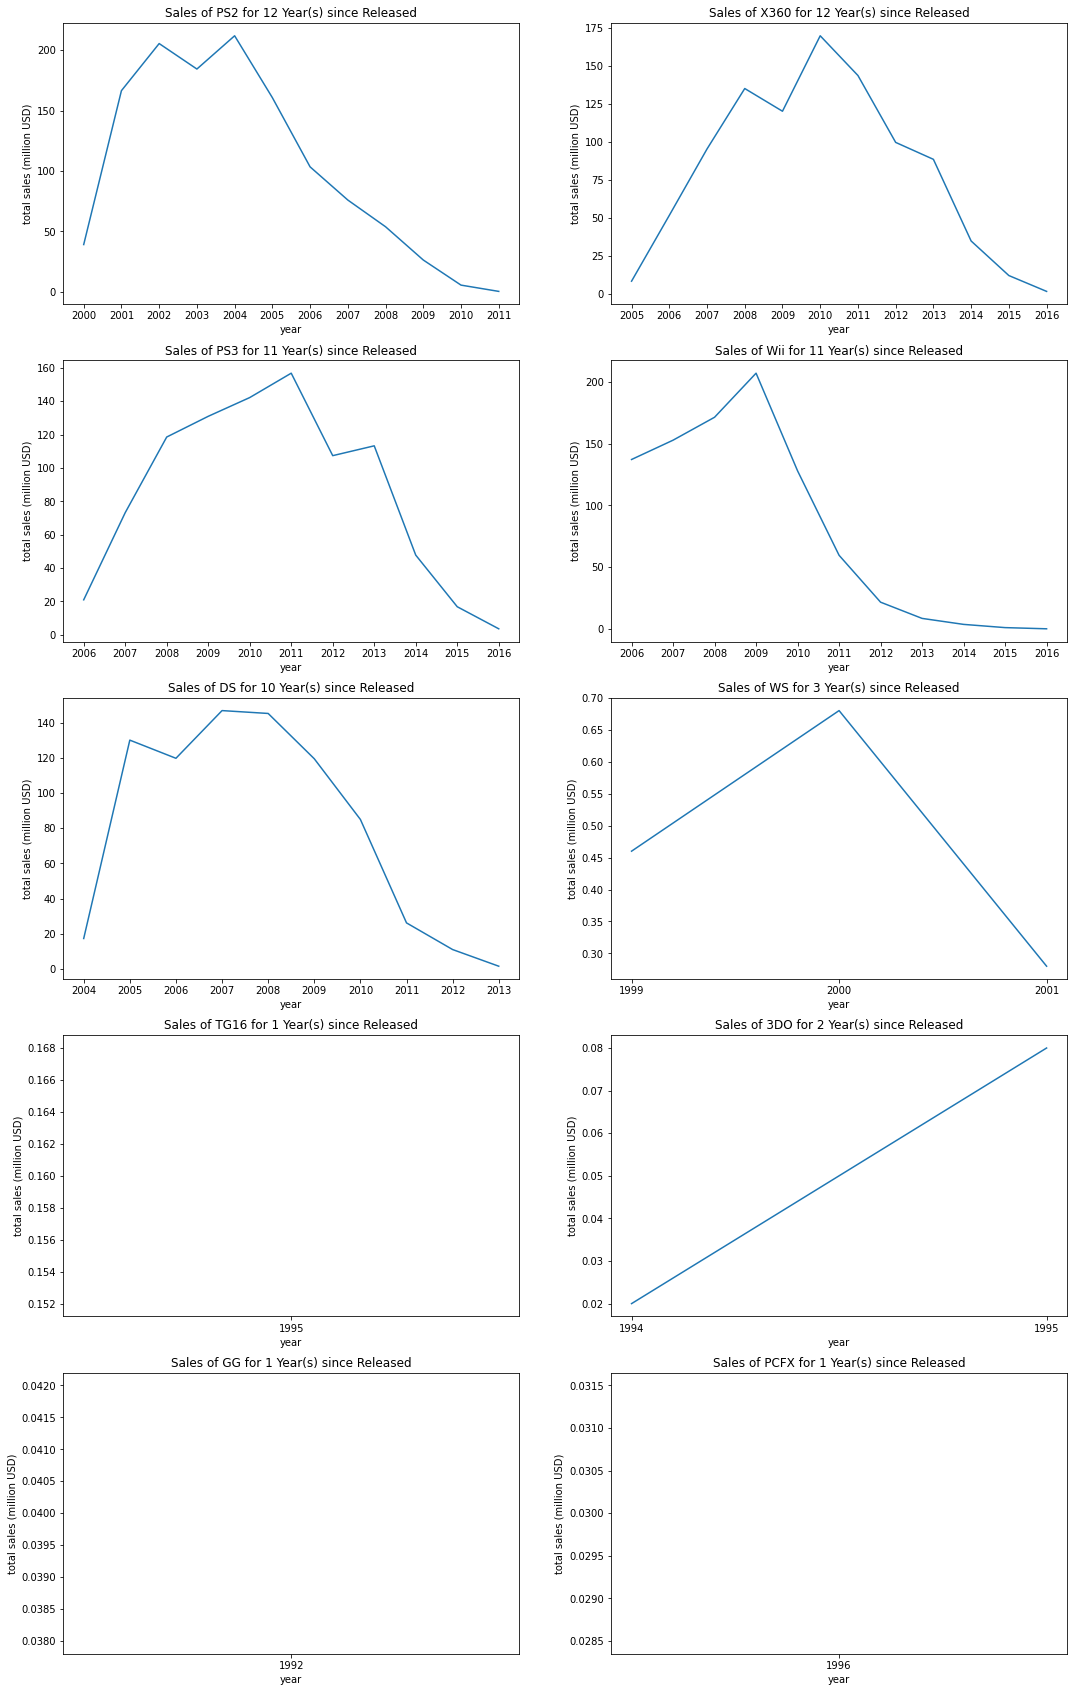

In [91]:
# Create lineplot
plt.figure(figsize=(18, 30))
i = 1
for platform in observe_selling:
    lifetime = (all_sales[platform]!=0).sum()
    plt.subplot(5, 2, i)
    plt.title(f'Sales of {platform} for {lifetime} Year(s) since Released')
    sns.lineplot(data=all_sales.loc[all_sales[platform] >0], x='year_of_release', y=platform)
    plt.xticks(all_sales.loc[all_sales[platform] > 0,'year_of_release'])
    plt.xlabel('year')
    plt.ylabel('total sales (million USD)')
    i += 1
plt.show()

A sample of 5 top seller platforms and 5 least selling ones are used to observe how long for platforms in average sells in the market.

Based on the observation, it appears that for those very marketable platforms, they enjoy growing sales for the first 4 years since their release. It goes on before sales begin to decline until no more sales made in their 12th year. 

While for the poor performing platforms, they make no sale after their first year, or only lasts for 3 years.

# Interim Conclusions

1. Well-performing platforms usually grow their sales up until the 4th year since their release.

2. They will continue to make sales until their 12th year being in the market, although the numbers are declining.

3. The most worthy of campaigning are the platforms that only have been around for less than 4 years.

### Relevant Years

From previous observations, it is known that top selling platforms will continue to boom until their 4th year post released. Hence to decide which platforms worth campaigning in 2017, only data 2013 release year onward that will be used in further analysis.

In [92]:
# Create new dataset only from 2013
games_new = games.loc[games.year_of_release >= 2013.0].reset_index(drop=True)

In [93]:
# Check the sample of the new dataset
games_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [94]:
# Check the statistical description of the new dataset
games_new.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,991.000000,1192.000000,2233.000000
mean,2014.477385,0.196019,0.175652,0.063045,0.053726,72.023209,6.584564,0.488442
std,1.089439,0.547730,0.512451,0.233997,0.165693,12.841318,1.610413,1.235226
min,2013.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.030000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,74.000000,7.000000,0.110000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,81.000000,7.800000,0.400000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000


In [95]:
# Change data type in Year_of_Release to integer
games_new.year_of_release = games_new.year_of_release.astype(int)

In [96]:
#Re-check general info
games_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           1256 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 209.5+ KB


### Potential Selling Platforms Ahead

In this step analysis is made to find platforms that have potential of growing in Year 2017.

In [97]:
# Pivot data for total sales of every platform
sales_platform = pd.pivot_table(games_new, columns='platform', values='total_sales', 
                                index='year_of_release', aggfunc='sum').reset_index()
sales_platform

platform,year_of_release,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
1,2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2,2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
3,2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [98]:
# Load platforms' name
sales_platform.columns

Index(['year_of_release', '3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii',
       'WiiU', 'X360', 'XOne'],
      dtype='object', name='platform')

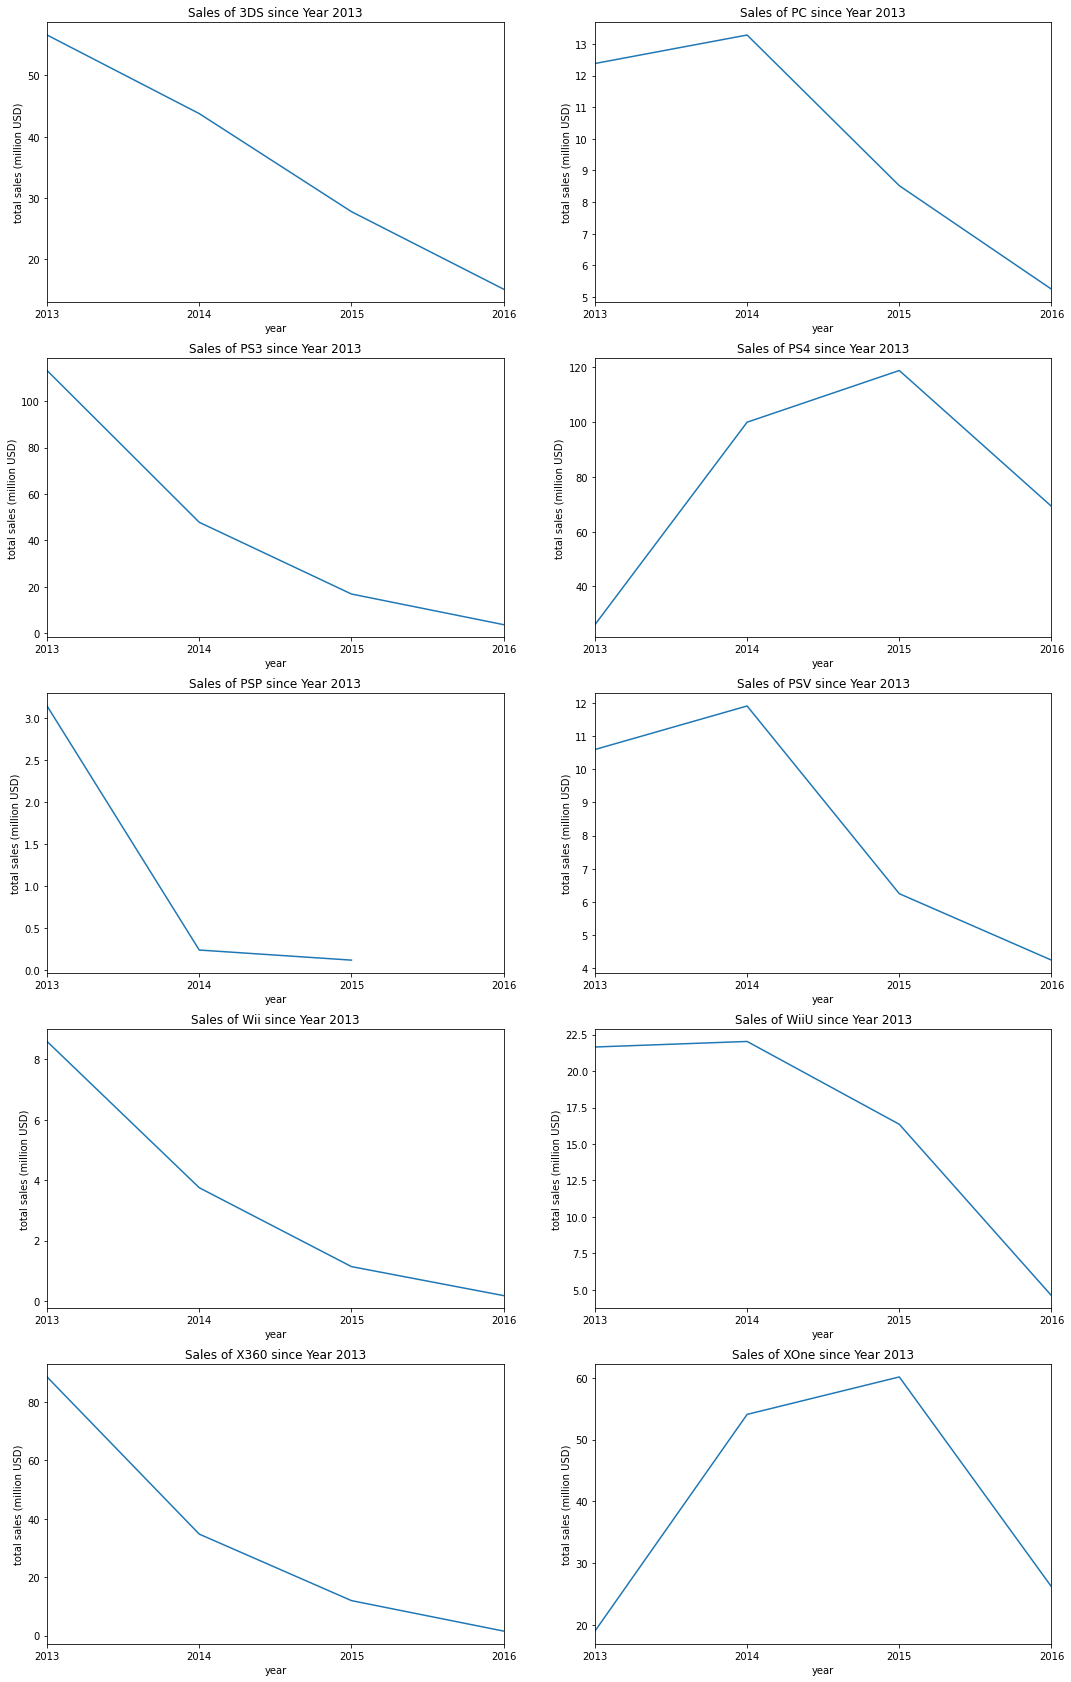

In [99]:
# Load lineplot for trend in sales of each platform
plt.figure(figsize=(18, 36))
i = 1
platforms =['3DS','PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii',
       'WiiU', 'X360', 'XOne']
for platform in platforms:
    plt.subplot(6, 2, i)
    plt.title(f'Sales of {platform} since Year 2013')
    sns.lineplot(data=sales_platform, x='year_of_release', y=platform)
    plt.xticks(sales_platform['year_of_release'])
    plt.xlabel('year')
    plt.ylabel('total sales (million USD)')
    i += 1
    plt.xlim(2013,2016)
plt.show()

# Interim Conclusions

There are 11 platforms that make sales in Year 2013. Trend of their sales is observed, except for DS that does not make any sales post Year 2013. From the 10 observed platforms, all are in their declining state in Year 2016. 

That said, platforms that are in their 1st year of declining as per Year 2016 are XOne and PS4. Hence has the most potential for selling in 2017 amongst all.

While those in the 2nd year of declining are WiiU, PSV and PC. 

And those that are either in the mature declining phase or not selling anymore in Year 2016 are DS, 3DS, PS3, PSP, Wii, and X360. Hence they have the most unlikely of making sales in Year 2017.

Considering this, platforms that is worth campaigning in Year 2017 are:

1. XOne

2. PS4

### Promising Sales Figure

Text(0.5, 1.0, 'Distribution of Total Sales on Every Platform')

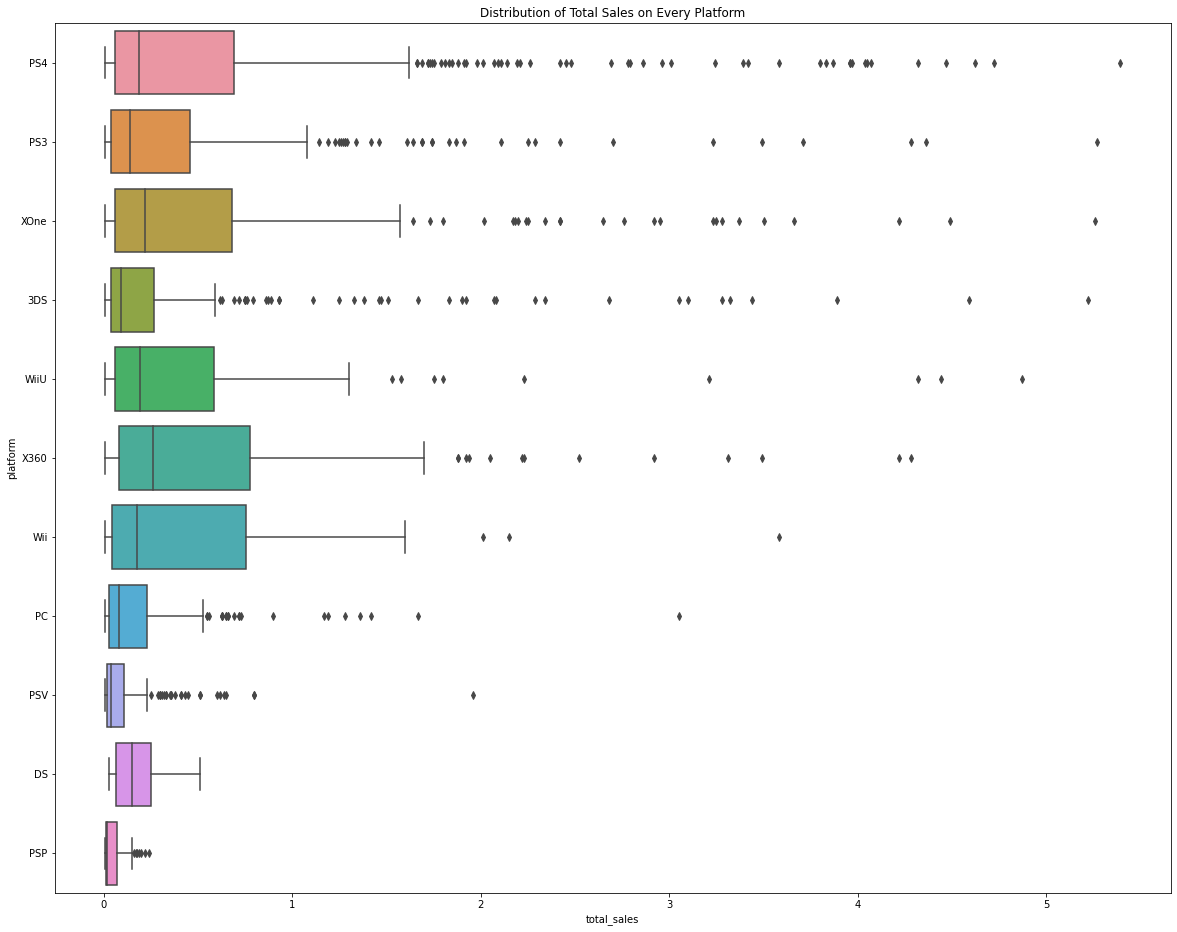

In [100]:
# Load boxplot from the new dataset to describe total sales on each platform
global_sales = pd.pivot_table(games_new, index=['platform','name'], values='total_sales', 
                                    aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
p99 = np.percentile(global_sales['total_sales'], 99)
boxplot_data = global_sales.loc[global_sales['total_sales'] < p99]
plt.figure(figsize=(20,16))
sns.boxplot(data=boxplot_data, y='platform', x='total_sales')
plt.title('Distribution of Total Sales on Every Platform')

In [101]:
# Pivot new dataset on platform for total sales in average
avg_sales_platform = pd.pivot_table(games_new, index='platform', values='total_sales', 
                                    aggfunc='mean').sort_values(by='total_sales', ascending=False).reset_index()
avg_sales_platform

,platform,total_sales
0,PS4,0.801378
1,X360,0.735484
2,XOne,0.645020
3,Wii,0.593913
4,WiiU,0.562000
5,PS3,0.525884
6,3DS,0.472772
7,PC,0.208624
8,DS,0.192500
9,PSV,0.092151


# Interim Conclusion

From visualising in a boxplot, it appears that X360 has the highest middle 50% distribution of total sales. It is followed by Wii, PS4, and XOne with insignificant difference.

It appears that means for each platform differ insignificantly for the top 4 platform. PS4 leads and is followed by X360, XOne, and Wii.

Hence looking at the statictical distribution for total sales of each platform, it is found that platforms with promising total sales are:

1. X360

2. PS4

3. Wii

4. XOne

### Critics Effect

In this step, analysis will be done on how reviews from critics and users affecting the sales of a platform. Platform of PS4 is chosen for its early phase and growing sales.

In [102]:
# Slice dataset for only PS4 data on column critic_score user_score and total_sales
reviews_PS4 = games_new.loc[games_new['platform'] == 'PS4', 
                              ['critic_score','user_score', 'total_sales']].reset_index(drop=True)
reviews_PS4 = reviews_PS4.fillna(0)
reviews_PS4

,critic_score,user_score,total_sales
0,0.0,0.0,14.63
1,97.0,8.3,12.62
2,82.0,4.3,8.58
3,0.0,0.0,7.98
4,83.0,5.7,7.66
...,...,...,...
387,69.0,7.5,0.01
388,0.0,0.0,0.01
389,61.0,7.9,0.01
390,51.0,5.5,0.01


In [103]:
# Slice dataset for only XOne data on column critic_score user_score and total_sales
reviews_XOne = games_new.loc[games_new['platform'] == 'XOne', 
                              ['critic_score','user_score', 'total_sales']].reset_index(drop=True)
reviews_XOne = reviews_XOne.fillna(0)
reviews_XOne

,critic_score,user_score,total_sales
0,0.0,0.0,7.39
1,97.0,7.9,5.47
2,81.0,5.4,5.26
3,84.0,6.4,4.49
4,88.0,6.2,4.22
...,...,...,...
242,63.0,8.2,0.01
243,0.0,6.6,0.01
244,0.0,0.0,0.01
245,74.0,6.7,0.01


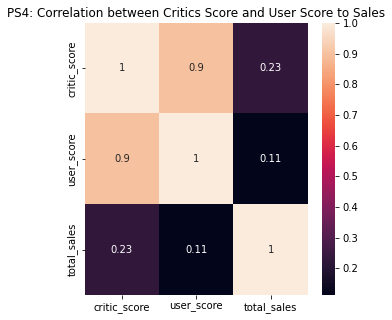

In [104]:
# Load heatmap to get correlation co-efficienct along with the visualisation
plt.figure(figsize=(5,5))
plt.title('PS4: Correlation between Critics Score and User Score to Sales')
sns.heatmap(reviews_PS4.corr(),annot=True)
plt.show()

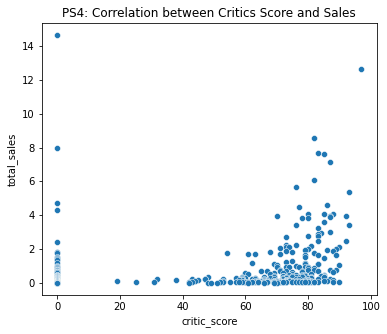

In [105]:
# Load scatterplot to visualise correlation between critic score and total sales
plt.figure(figsize=(6,5))
plt.title('PS4: Correlation between Critics Score and Sales')
sns.scatterplot(data=reviews_PS4,x='critic_score', y='total_sales')
plt.show()

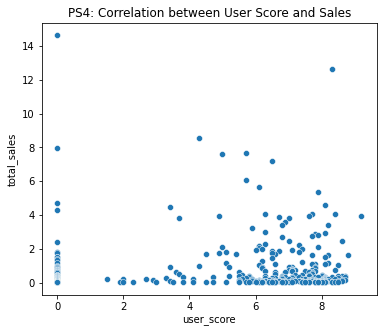

In [106]:
# Load scatterplot to visualise correlation between user score and total sales
plt.figure(figsize=(6,5))
plt.title('PS4: Correlation between User Score and Sales')
sns.scatterplot(data=reviews_PS4,x='user_score', y='total_sales')
plt.show()

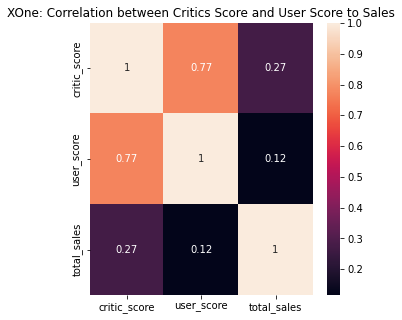

In [107]:
# Load heatmap to get correlation co-efficienct along with the visualisation
plt.figure(figsize=(5,5))
plt.title('XOne: Correlation between Critics Score and User Score to Sales')
sns.heatmap(reviews_XOne.corr(),annot=True)
plt.show()

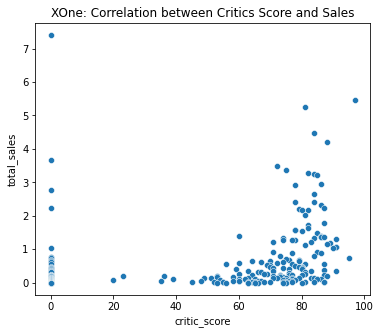

In [108]:
# Load scatterplot to visualise correlation between critic score and total sales
plt.figure(figsize=(6,5))
plt.title('XOne: Correlation between Critics Score and Sales')
sns.scatterplot(data=reviews_XOne,x='critic_score', y='total_sales')
plt.show()

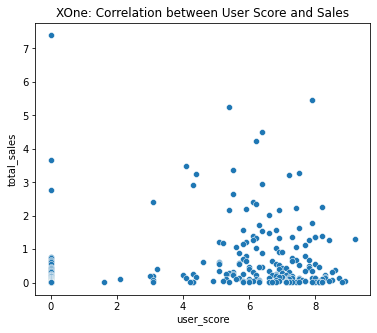

In [109]:
# Load scatterplot to visualise correlation between user score and total sales
plt.figure(figsize=(6,5))
plt.title('XOne: Correlation between User Score and Sales')
sns.scatterplot(data=reviews_XOne,x='user_score', y='total_sales')
plt.show()

# Interim Conclusion

For the case on both PS4 and Xone, it can be concluded that:

1. There is a moderate positive correlation between critic score and user score

2. There is a moderate positive correlation between critic score and total sales

3. There is almost no correlation between user score and total sales

### Popular Genre
In this step, how genre are attaining sales is observed.

In [110]:
# Pivot total sales of every genre
pd.pivot_table(games_new, index='genre', values='total_sales', 
               aggfunc='sum').sort_values(by='total_sales',ascending=False)

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


In [111]:
# Pivot the dataset on sales trend of every genre
genre_year = pd.pivot_table(games_new, index='genre', values='total_sales', columns='year_of_release', 
                              aggfunc='sum').T
genre_year

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2013,122.51,6.09,7.09,25.27,24.54,0.96,12.37,44.45,62.04,8.63,41.17,6.12
2014,97.23,5.57,15.85,23.38,8.81,1.49,16.66,45.62,65.21,5.58,45.15,0.98
2015,72.02,8.16,7.90,11.57,6.05,0.71,8.07,37.64,67.51,5.66,40.84,1.85
2016,30.11,3.82,4.47,2.60,3.23,0.01,2.79,18.18,38.22,1.89,23.49,1.13


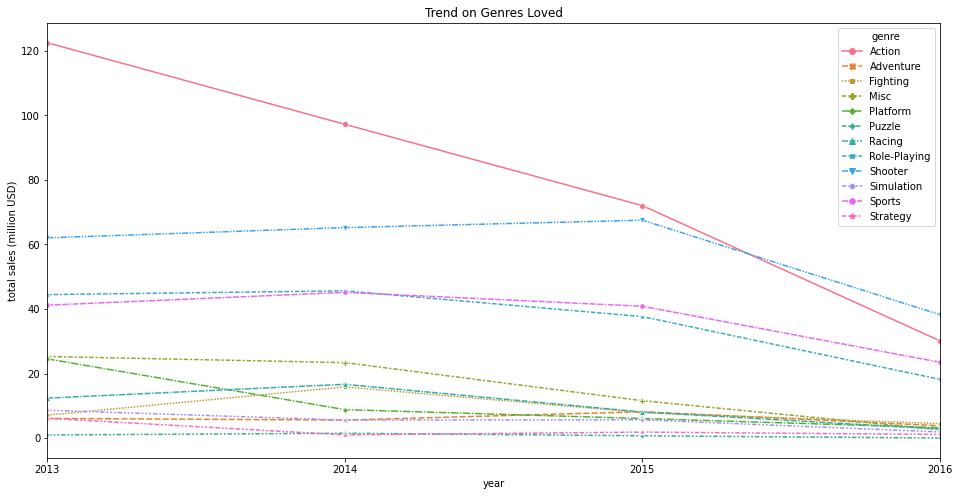

In [113]:
# Load lineplot for sales trend of every genre
plt.figure(figsize=(16, 8))
sns.lineplot(data=genre_year,markers=True)
plt.title('Trend on Genres Loved')
plt.xticks(genre_year.index)
plt.xlabel('year')
plt.ylabel('total sales (million USD)')
plt.xlim(2013,2016)
plt.show()

# Interim Conclusion

Observing total sales per genre, it appears that genre Action is the most marketable, followed by Shooter and Sport. 

However, trend did change over every year from 2013 to 2016. In Year 2013, Action made the highest sales, followed by Shooter and Role-Playing. While in Year 2016, Shooter made the highest sales, followed by Action and Sports.

## Zoning Enthuasiasm

In this step below analysis will be made:

1. Find the top 5 best selling platforms in regions North America (NA), Europe (EU), and Japan (JP)

2. Find the top 5 most favorite genres in regions NA, EU and JP

3. Find how rating from Entertainment Software Rating Board (ESRB) makes sales in regions NA, EU and JP

### Platforms that Beat the Rests

In [114]:
# Load dataset sample
games_new.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63


In [115]:
# Pivot the dataset on sales in NA, EU, JP for each platform
top_platforms = pd.pivot_table(games_new, index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], 
                             aggfunc='sum')
top_platforms

,eu_sales,jp_sales,na_sales
platform,,,
3DS,30.96,67.81,38.20
DS,0.85,0.00,0.57
PC,25.36,0.00,11.11
PS3,67.81,23.35,63.50
PS4,141.09,15.96,108.74
PSP,0.17,3.29,0.00
PSV,6.10,18.59,5.04
Wii,5.93,0.05,6.56
WiiU,19.85,10.88,29.21


In [116]:
# Add column for total sales in the 3 regions to decide which platforms are the top 5 best setllers
top_platforms['total_regions'] = top_platforms['na_sales'] + top_platforms['eu_sales'] + top_platforms['jp_sales']
top_platforms = top_platforms.sort_values(by='total_regions',ascending=False)
top_platforms

,eu_sales,jp_sales,na_sales,total_regions
platform,,,,
PS4,141.09,15.96,108.74,265.79
PS3,67.81,23.35,63.50,154.66
XOne,51.59,0.34,93.12,145.05
3DS,30.96,67.81,38.20,136.97
X360,42.52,0.51,81.66,124.69
WiiU,19.85,10.88,29.21,59.94
PC,25.36,0.00,11.11,36.47
PSV,6.10,18.59,5.04,29.73
Wii,5.93,0.05,6.56,12.54


The top 5 best sellers in regions NA, EU and JP are:

1. PS4

2. PS3

3. XOne

4. 3DS

5. X360

In [117]:
# Transpose table for easier analysis
top_platforms = top_platforms.T.reset_index()
top_platforms

platform,index,PS4,PS3,XOne,3DS,X360,WiiU,PC,PSV,Wii,PSP,DS
0,eu_sales,141.09,67.81,51.59,30.96,42.52,19.85,25.36,6.10,5.93,0.17,0.85
1,jp_sales,15.96,23.35,0.34,67.81,0.51,10.88,0.00,18.59,0.05,3.29,0.00
2,na_sales,108.74,63.50,93.12,38.20,81.66,29.21,11.11,5.04,6.56,0.00,0.57
3,total_regions,265.79,154.66,145.05,136.97,124.69,59.94,36.47,29.73,12.54,3.46,1.42


In [118]:
# Drop column total
top_platforms = top_platforms.drop(index=3,axis=0)

In [119]:
# Change columns name
top_platforms.columns = ['region','PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV',
       'Wii', 'PSP', 'DS']
top_platforms

,region,PS4,PS3,XOne,3DS,X360,WiiU,PC,PSV,Wii,PSP,DS
0,eu_sales,141.09,67.81,51.59,30.96,42.52,19.85,25.36,6.10,5.93,0.17,0.85
1,jp_sales,15.96,23.35,0.34,67.81,0.51,10.88,0.00,18.59,0.05,3.29,0.00
2,na_sales,108.74,63.50,93.12,38.20,81.66,29.21,11.11,5.04,6.56,0.00,0.57


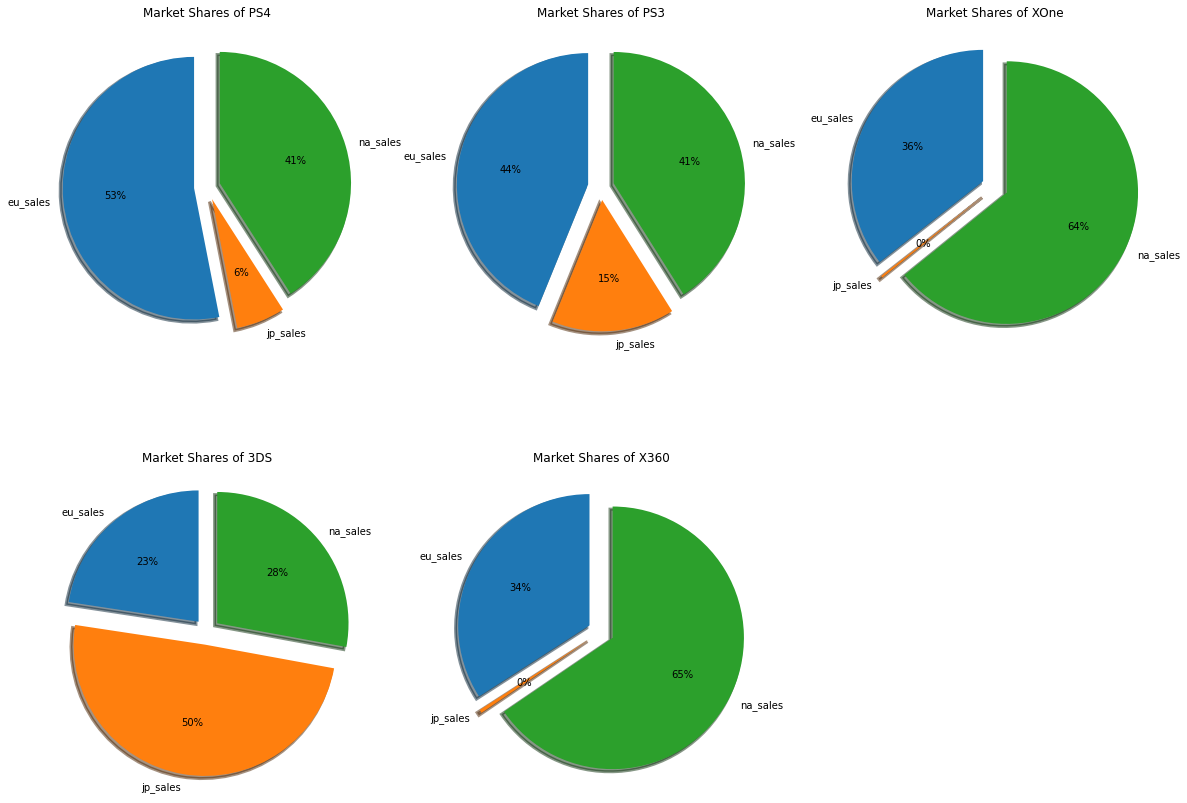

In [120]:
# Load pie chart to show market shares of the top 5 in each region

top_five = ['PS4', 'PS3', 'XOne','3DS','X360']
plt.figure(figsize=(20,15))
for i, platform in enumerate(top_five):
    plt.subplot(2,len(top_five)-2,i+1)
    plt.title(f'Market Shares of {platform}')
    plt.pie(top_platforms[platform], labels=top_platforms['region'], autopct='%.0f%%',
           startangle=90, wedgeprops = {'linewidth': 3}, 
            shadow=True, explode=(0.1,0.1,0.1))
    
plt.show()

Platforms PS4 and PS3 have the bigest market share in Europe.

XOne and X360 have the bigest share in North America.

3DS has the biggest share in Japan.

### What Genre is Favored?

In [121]:
# Pivot dataset on genre for each sales in each of 3 regions
genre_sales = pd.pivot_table(games_new, index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], 
                             aggfunc='sum')

In [122]:
# add column for total sales of the 3 regions
genre_sales['total_regions'] = genre_sales['na_sales'] + genre_sales['eu_sales'] + genre_sales['jp_sales']
genre_sales = genre_sales.sort_values(by='total_regions',ascending=False)
genre_sales

,eu_sales,jp_sales,na_sales,total_regions
genre,,,,
Action,118.13,40.49,126.05,284.67
Shooter,87.86,6.61,109.74,204.21
Role-Playing,36.97,51.04,46.40,134.41
Sports,60.52,5.41,65.27,131.20
Misc,20.04,9.20,27.49,56.73
Platform,15.58,4.79,18.14,38.51
Racing,20.19,2.30,12.96,35.45
Fighting,8.55,7.65,15.55,31.75
Adventure,8.25,5.82,7.14,21.21


The top 5 most favorite genres in regions NA, EU and JP are:

1. Action

2. Shooter

3. Role-Playing

4. Sports

5. Misc

In [123]:
# Transpose table for easier analysis
genre_sales = genre_sales.T.reset_index()
genre_sales

genre,index,Action,Shooter,Role-Playing,Sports,Misc,Platform,Racing,Fighting,Adventure,Simulation,Strategy,Puzzle
0,eu_sales,118.13,87.86,36.97,60.52,20.04,15.58,20.19,8.55,8.25,10.92,4.22,1.00
1,jp_sales,40.49,6.61,51.04,5.41,9.20,4.79,2.30,7.65,5.82,4.52,1.77,1.18
2,na_sales,126.05,109.74,46.40,65.27,27.49,18.14,12.96,15.55,7.14,4.86,3.28,0.83
3,total_regions,284.67,204.21,134.41,131.20,56.73,38.51,35.45,31.75,21.21,20.30,9.27,3.01


In [124]:
# Drop column total
genre_sales = genre_sales.drop(index=3,axis=0)

In [125]:
# Change columns name
genre_sales.columns
genre_sales.columns = ['region','Action', 'Shooter', 'Role-Playing', 'Sports', 'Misc',
       'Platform', 'Racing', 'Fighting', 'Adventure', 'Simulation', 'Strategy',
       'Puzzle']
genre_sales

,region,Action,Shooter,Role-Playing,Sports,Misc,Platform,Racing,Fighting,Adventure,Simulation,Strategy,Puzzle
0,eu_sales,118.13,87.86,36.97,60.52,20.04,15.58,20.19,8.55,8.25,10.92,4.22,1.00
1,jp_sales,40.49,6.61,51.04,5.41,9.20,4.79,2.30,7.65,5.82,4.52,1.77,1.18
2,na_sales,126.05,109.74,46.40,65.27,27.49,18.14,12.96,15.55,7.14,4.86,3.28,0.83


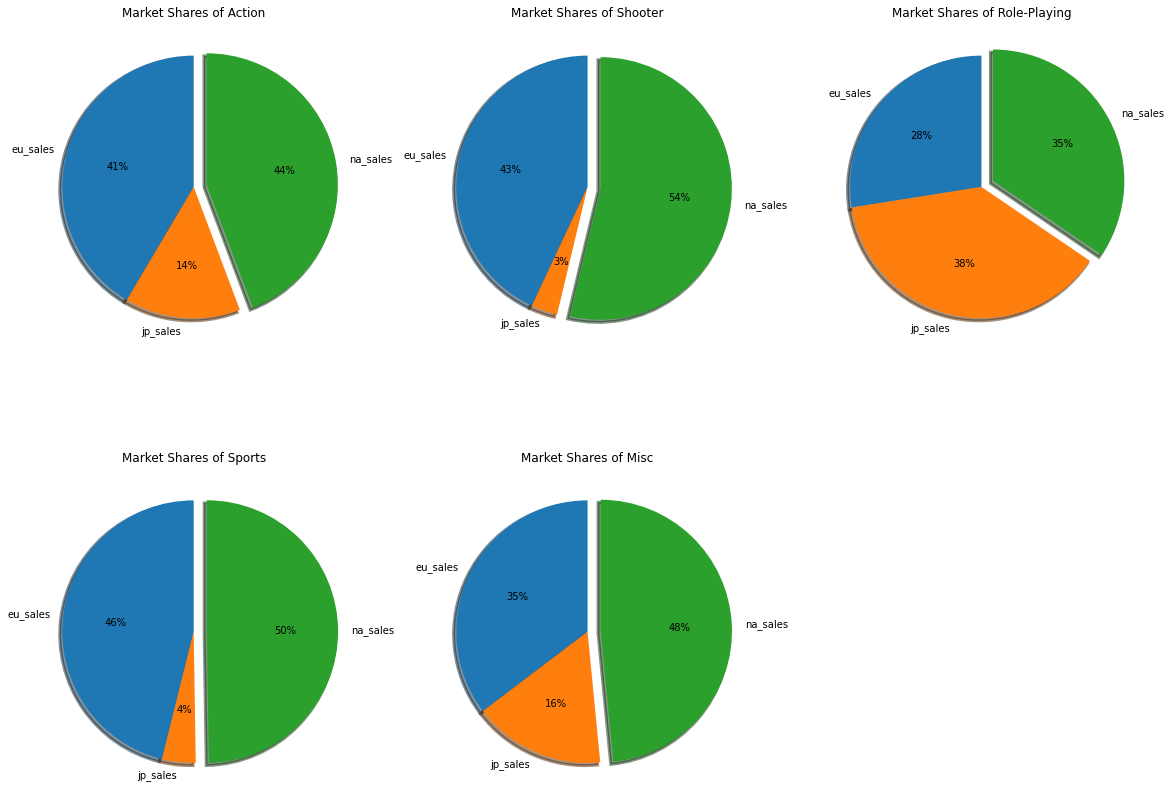

In [126]:
# Load pie chart to show market shares of the top 5 most favorite genres in each region
top_genres = ['Action','Shooter','Role-Playing','Sports','Misc']
plt.figure(figsize=(20,15))
for i, genre in enumerate(top_genres):
    plt.subplot(2,len(top_genres)-2,i+1)
    plt.title(f'Market Shares of {genre}')
    plt.pie(genre_sales[genre], labels=genre_sales['region'], autopct='%.0f%%', 
            startangle=90, wedgeprops = {'linewidth': 3}, 
            shadow=True, explode=(0,0,0.1))
plt.show()

All the top 5 most favorite genres have the biggest market share in North America, except for Role-Playing which biggest share is in Japan.

### Does ESRB Rating Matter?

In [127]:
# Pivot the dataset for sales of each rating in each region
rating_sales = pd.pivot_table(games_new, index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], 
                             aggfunc='sum').reset_index()

In [128]:
# Add column for total sales of the 3 regions
rating_sales['total_regions'] = rating_sales['na_sales'] + rating_sales['eu_sales'] + rating_sales['jp_sales']
rating_sales = rating_sales.sort_values(by='total_regions',ascending=False).reset_index(drop=True)
rating_sales

,rating,eu_sales,jp_sales,na_sales,total_regions
0,M,145.32,14.11,165.21,324.64
1,E,83.36,15.14,79.05,177.55
2,T,41.95,20.59,49.79,112.33
3,E10+,42.69,5.89,54.24,102.82


Aggregate-wise, rating Mature17+ makes the biggest market shares in three regions combined. It is then followed by Everyone, Teen, and Everyone10+.

In [129]:
# Drop column total
rating_sales = rating_sales.drop(columns='total_regions',axis=1)
rating_sales

,rating,eu_sales,jp_sales,na_sales
0,M,145.32,14.11,165.21
1,E,83.36,15.14,79.05
2,T,41.95,20.59,49.79
3,E10+,42.69,5.89,54.24


In [130]:
# Make new column naming
rating_sales.columns
rating_sales.columns = ['rating', 'EU', 'JP', 'NA']

In [131]:
# Make list of region
region = list(rating_sales.columns)
del region[0]
region

['EU', 'JP', 'NA']

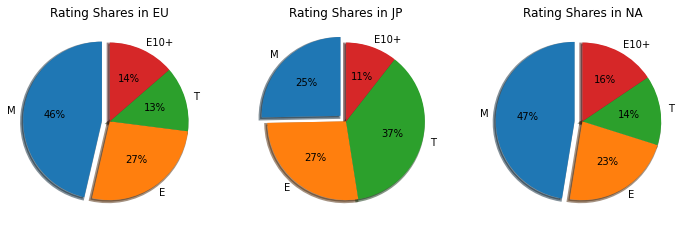

In [132]:
# Load pie chart to show rating shares of each region
plt.figure(figsize=(12,12))
for i, reg in enumerate(region):
    plt.subplot(1,len(region),i+1)
    plt.title(f'Rating Shares in {reg}')
    plt.pie(rating_sales[reg], labels=rating_sales['rating'], autopct='%.0f%%', startangle=90, wedgeprops = {'linewidth': 3}, 
            shadow=True, explode=(0.1,0,0,0))
    
plt.show()

# Interim Conclusion

Rating Mature+17 makes the biggest sales in three regions combined.

However, although the most selling in North America and Europe is Mature 17+, Japan's market loves Teen the best.

## Hypothesis Testing

In this step 2 hypothesis will be tested:

1. Average user scoring over platforms XOne and PC is the same

2. Average user scoring over genre Action and Sports is the same

### Users Vote: Xbox One vs PC

In [133]:
# Load sample of data
games_new.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63


In [134]:
# Slice the dataset only for user score over XOne
score_xone = games_new.query('platform == "XOne"').dropna().reset_index()
score_xone = score_xone['user_score']
score_xone.describe()

count    159.000000
mean       6.493082
std        1.338435
min        2.100000
25%        5.800000
50%        6.700000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [135]:
# Slice the dataset only for user score over PC
score_pc = games_new.query('platform == "PC"').dropna().reset_index()
score_pc = score_pc['user_score']
score_pc.describe()

count    133.000000
mean       6.218797
std        1.757803
min        1.400000
25%        4.800000
50%        6.700000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

In [136]:
# Load variance
var_xone = np.var(score_xone)
var_pc = np.var(score_pc)
var_xone, var_pc

(1.780140817214509, 3.066639154276669)

In [137]:
# Load Standard Deviation
std_xone = np.sqrt(var_xone)
std_pc = np.sqrt(var_pc)
std_xone, std_pc

(1.3342191788512519, 1.7511822161833044)

In testing whether scoring over XOne and PC is the same, alpha is set at 10%. This is because of the small numbers of population (less than 1,000).

Variance of XOne is 1.78, and PC is 3.06. Although variances of both sample seems quite different, a levene test will be done to test if both variances are in average the same.

In [138]:
# set alpha at 10%
alpha = 0.1

In [139]:
# Make a levene test on how both variances vary
p_value_levene = st.levene(score_xone,score_pc).pvalue
print(p_value_levene)

if p_value_levene < alpha:
    print('Reject H0: Variances are not equal')
else:
    print('Fail to reject H0: There is insufficient evidence that the variances are not equal')

0.0010156997628706032
Reject H0: Variances are not equal


Next, the hypothesis will be tested using statistical ttest for independent samples.

H0 = average user scoring over XOne and PC is the same

H1 = average user scoring over XOne and PC is not the same

In [140]:
# Testing the hypothesis using ttest_ind method
results = st.ttest_ind(score_xone, score_pc, equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Reject hypothesis null")
else:
    print("Fail to reject hypothesis null")

p-value: 0.14104275299383137
Fail to reject hypothesis null


# Interim Conclusions

In testing hypothesis that platforms XOne and PC are scored by users the same, an independent test using scipy.stats.ttest_ind method is applied.

Alpha is set at 10% because of the small population.

Equal_var argument is set to false because the levene test shows that the variances of both samples are not equal.

Result of the testing shows that H0 can not be rejected. This means it can be assumed that platforms XOne and PC are scored by users the same.

From the means, it is known that average user score on XOne and PC is similar.


### Users Vote: Action vs Sports

In [141]:
# Slice the dataset only for user score over Action
score_action = games_new.query('genre == "Action"').dropna().reset_index()
score_action = score_action['user_score']
score_action.describe()

count    301.000000
mean       6.913621
std        1.288532
min        2.000000
25%        6.400000
50%        7.300000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [142]:
# Slice the dataset only for user score over Sports
score_sports = games_new.query('genre == "Sports"').dropna().reset_index()
score_sports = score_sports['user_score']
score_sports.describe()

count    106.000000
mean       5.663208
std        1.466017
min        1.500000
25%        4.675000
50%        5.900000
75%        6.675000
max        8.700000
Name: user_score, dtype: float64

In [143]:
# Load variance
var_action = np.var(score_action)
var_sports = np.var(score_sports)
var_action, var_sports

(1.6547978499133564, 2.1289293342826627)

In [144]:
# Load Standard Deviation
std_action = np.sqrt(var_action)
std_sports = np.sqrt(var_sports)
std_action, std_sports

(1.2863894627652064, 1.4590851017958695)

In testing whether scoring over genre Action and Sports is the same, alpha is set at 10%. This is because of the small numbers of population (less than 1,000).

Variance of Action is 1.65, and Sports is 2.12. Although variances of both sample seems quite different, a levene test will be done to test if both variances are in average the same.

In [145]:
# set alpha at 10%
alpha2 = 0.1

In [146]:
# Make a levene test on how both variances vary
p_value_levene2 = st.levene(score_action,score_sports).pvalue
print(p_value_levene2)

if p_value_levene2 < alpha2:
    print('Reject H0: Variances are not equal')
else:
    print('Fail to reject H0: There is insufficient evidence that the variances are not equal')

0.07164659043569324
Reject H0: Variances are not equal


In [147]:
# Testing the hypothesis using ttest_ind method
results2 = st.ttest_ind(score_action, score_sports, equal_var=False)
print('p-value:', results2.pvalue)

if results2.pvalue < alpha2:
    print("Reject hypothesis null")
else:
    print("Fail to reject hypothesis null")

p-value: 7.136312729062867e-13
Reject hypothesis null


# Interim Conclusions

In testing hypothesis that genre Action and Sports are scored by users the same, an independent test using scipy.stats.ttest_ind method is applied.

Alpha is set at 10% because of the small population.

Equal_var argument is set to false because the levene test shows that the variances of both samples are not equal.

Result of the testing shows that H0 is rejected. This means it can be assumed that platforms XOne and PC are scored by users differently.

From the means, it is known that average user score on XOne and PC is different.


## Final Conclusions

The analysis in this project is started by pre-processing. In this stage, insignificant missing values are filled, and mismatch data type is handle. Some unreasonable release year is replaced with reference to the description in name. Naming on columns is made all lowercase. While the significant missing values are left as they are.

In the Exploratory Data Analysis (EDA), several findings are made:

1. For the very marketable platforms, sales grow for the first 4 years since their release and reach the peak. The declining then begin to happen until no more sales made in their 12th year.

2. Trend has changed significantly since 1980. The dataset used for analysis over Year 2017 then is limited only as far back to Year 2013.

3. In terms of maturity and potential sales figure, platforms that is worth campaigning in Year 2017 are: XOne and PS4.

4. Critic score has a moderate positive correlation with total sales. While user score almost has no correlation.

5. Genre-wise, trend did change every year from 2013 to 2016. In Year 2016, genre that made the highest sales is Shooter, Action and Sports.

6. When observing market in North America, Europe, and Japan:

    1. Europe is dominated by platforms PS4 and PS3
    
    2. North America by XOne and X360
    
    3. Japan by 3DS
    
7. Genre-wise, Action, Shooter, Role-Playing and Sports are most loved in North America. While Role-Playing is making hit in Japan.

8. ESRB rating games is chosen differently across the three regions. The most selling rating games in North America and Europe is Mature 17+, while Japan's market loves Teen the most. That said, aggregately, Mature+17 games makes the biggest sales in the three regions combined.

9. User perception over platforms XOne and PC is similar.

10. User perception over genre Action and Sport is different.


From the analysis and hypothesis testing done, it is recommended that campaign in Year 2017 is focused on games that are available in XOne and PS4. For regions North America and Europe, it should be targeted on selling more games with genre Action, Sports, Shooter that are still growing in 2016. While Japan is a little unique, games with genre Role-Playing with rating Teens are recommended to be promoted more. 

